<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/path_planning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

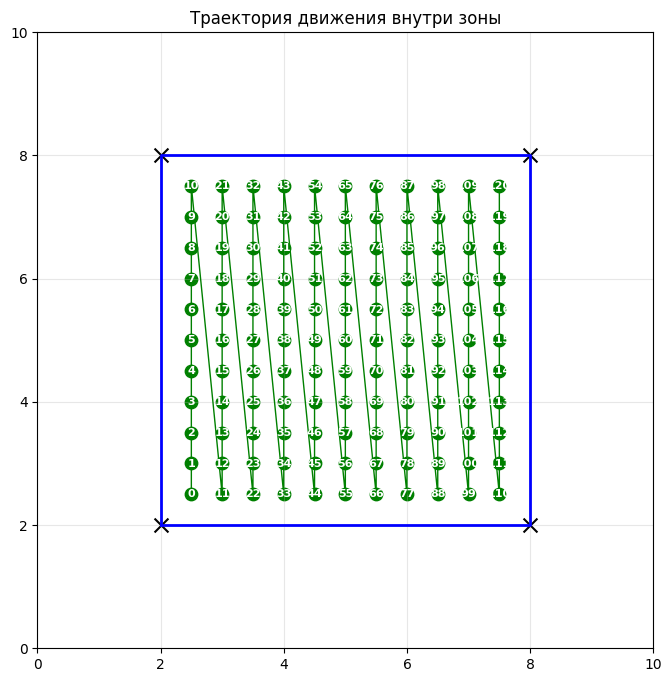

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

# Создаем карту и препятствия
fig, ax = plt.subplots(figsize=(8, 8))
obstacles = np.array([[2, 2], [8, 8], [8, 2], [2, 8]])

# Строим выпуклую оболочку
hull = ConvexHull(obstacles)
polygon = obstacles[hull.vertices]

# Генерируем точки внутри полигона
def generate_points(polygon, spacing=0.5):
    min_coords = np.min(polygon, axis=0)
    max_coords = np.max(polygon, axis=0)

    points = []
    for x in np.arange(min_coords[0], max_coords[0], spacing):
        for y in np.arange(min_coords[1], max_coords[1], spacing):
            if point_inside_polygon([x, y], polygon):
                points.append([x, y])
    return np.array(points)

def point_inside_polygon(point, polygon):
    x, y = point
    n = len(polygon)
    inside = False

    p1x, p1y = polygon[0]
    for i in range(1, n + 1):
        p2x, p2y = polygon[i % n]
        if min(p1y, p2y) < y <= max(p1y, p2y) and x <= max(p1x, p2x):
            if p1y != p2y:
                xinters = (y - p1y) * (p2x - p1x) / (p2y - p1y) + p1x
            if p1x == p2x or x <= xinters:
                inside = not inside
        p1x, p1y = p2x, p2y

    return inside

# Генерируем и отображаем точки
inner_points = generate_points(polygon, 0.5)

# Визуализация
ax.scatter(obstacles[:, 0], obstacles[:, 1], color='black', marker='x', s=100)
ax.plot(np.append(polygon[:, 0], polygon[0, 0]),
        np.append(polygon[:, 1], polygon[0, 1]), 'b-', linewidth=2)

if len(inner_points) > 0:
    ax.scatter(inner_points[:, 0], inner_points[:, 1], color='green', s=80)
    ax.plot(inner_points[:, 0], inner_points[:, 1], 'g-', linewidth=1)

    for i, point in enumerate(inner_points):
        ax.text(point[0], point[1], str(i), fontsize=8, ha='center',
                va='center', color='white', weight='bold')

# Настройки отображения
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_aspect('equal')
ax.grid(True, alpha=0.3)
ax.set_title('Траектория движения внутри зоны')
plt.show()